# Q4

import the libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

read both images and plot them

In [2]:
# Source code of this function:
# https://stackoverflow.com/questions/52939362/trouble-displaying-image-hsi-converted-to-rgb-python

def show_images(T, cols=1):
    """
    Display multiple images in a grid.
    Args:
        T (list): List of tuples containing image and title.
        cols (int): Number of columns in the grid. Default is 1.
    """
    N = len(T)
    fig = plt.figure()
    for i in range(N):
        a = fig.add_subplot(int(np.ceil(N/float(cols))), cols, i+1)
        try:
            img,title = T[i]
        except ValueError:
            img,title = T[i], "Image %d" % (i+1)
        if(img.ndim == 2):
            plt.gray()
        plt.imshow(img)
        a.set_title(title)
        # plt.xticks([0,img.shape[1]]), plt.yticks([0,img.shape[0]])
    fig.set_size_inches(np.array(fig.get_size_inches()) * N)
    plt.show()

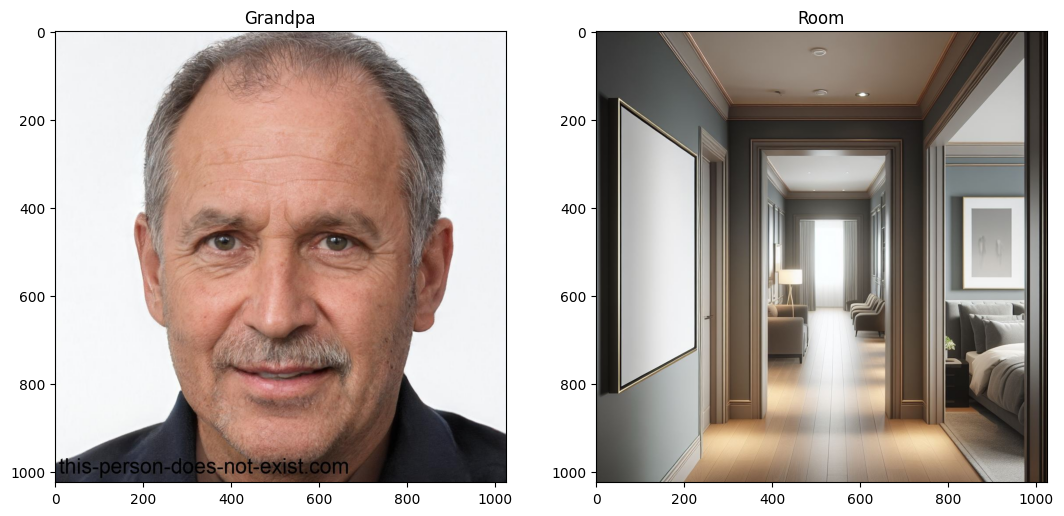

In [4]:
img1_path = 'images/q4_grandpa.jpeg'
img2_path = 'images/q4_room.jpeg'

img1 = cv2.imread(img1_path, cv2.IMREAD_COLOR)
img2 = cv2.imread(img2_path, cv2.IMREAD_COLOR)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

show_images(
    [(img1, "Grandpa"),
    (img2, "Room")], 2
)

add black ribbon to grandpa image

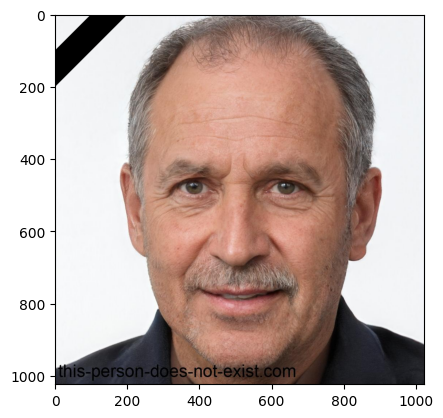

In [5]:
pts = np.array([[0, 200], [200, 0],
                [100, 0], [0, 100]],
               np.int32)

cv2.fillPoly(img1, pts=[pts], color=(0, 0, 0))

plt.imshow(img1)

define the coordinates of destination image

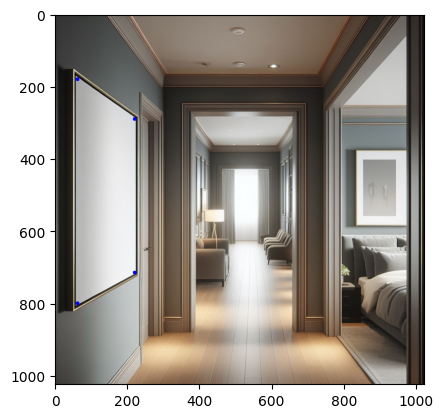

In [6]:
img = img2.copy()

dest_pts = np.array([
        [62, 180],
        [62, 800],
        [220, 290],
        [220, 715]
    ])

for pt in dest_pts:
    img = cv2.circle(img, pt, 5, (0, 0, 255), -1)

plt.imshow(img)

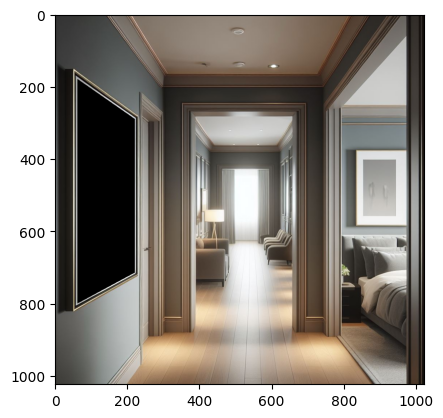

In [7]:
img = img2.copy()

# Define the polygon points
points = np.array([dest_pts[1], dest_pts[0], dest_pts[2], dest_pts[3]])

# Fill the polygon with black color
img = cv2.fillPoly(img, pts=[points], color=(0, 0, 0))

plt.imshow(img)

img2 = img

get the transform matrix

In [8]:
img = img1.copy()
cols, rows, _ = img1.shape

src_pts = np.float32([
    (0, 0),
    (0, cols),
    (rows, 0),
    (rows, cols)
])

dest_pts = np.float32(dest_pts)

# Compute the perspective transform matrix
M = cv2.getPerspectiveTransform(src_pts, dest_pts)

apply the transform and plot the result

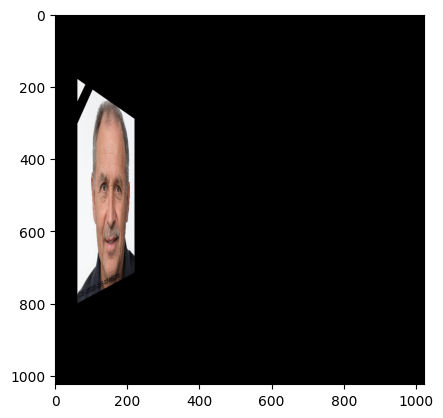

In [9]:
# Apply the perspective transformation
mask = cv2.warpPerspective(img, M, (cols, rows))

plt.imshow(mask)

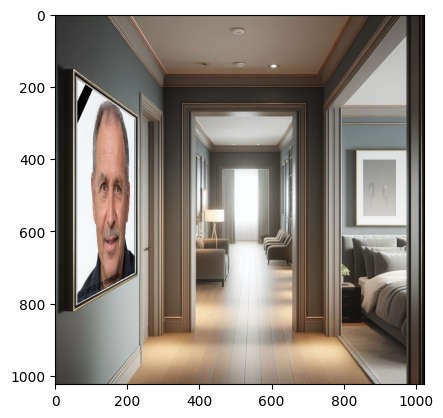

In [10]:
img = img2.copy()

img += mask

plt.imshow(img)